In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
%matplotlib inline
from scipy.stats import norm
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense,Layer,Lambda,Add,Multiply,Input,Conv2D,MaxPool2D,Flatten,Conv2DTranspose,Reshape,Dropout,GlobalAveragePooling2D,GaussianNoise
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mse
import pandas as pd
import shutil
from skimage.filters import threshold_local
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [2]:
import os

# create clean project folder structure
BASE_DIR = os.path.join(os.getcwd(), "my_cnn_project")
PLOTS_DIR = os.path.join(BASE_DIR, "outputs", "plots")
GIFS_DIR = os.path.join(BASE_DIR, "outputs", "gifs")
MODELS_DIR = os.path.join(BASE_DIR, "outputs", "models")

for d in [PLOTS_DIR, GIFS_DIR, MODELS_DIR]:
    os.makedirs(d, exist_ok=True)

print("All outputs will be saved under:", BASE_DIR)


All outputs will be saved under: C:\Users\HP\Desktop\EINSTEIN THE APPLE  OF MY  EYE\my_cnn_project


PROCESSING DATA

In [3]:
X_train_path = r"C:\Users\HP\Desktop\Reconstruction of Holograms\X_train_HOLO\Labels"
y_train_path = r"C:\Users\HP\Desktop\Reconstruction of Holograms\y_train_obj\objects"

In [5]:
X_train_list = os.listdir(path=X_train_path+'.')
y_train_list = os.listdir(path=y_train_path+'.')

In [6]:
X_train_list.sort()
y_train_list.sort()
print(X_train_list[1:10])
print(y_train_list[1:10])

['H1010.png', 'H10100.png', 'H10101.png', 'H10102.png', 'H10103.png', 'H10104.png', 'H10105.png', 'H10106.png', 'H10107.png']
['O1010.png', 'O10100.png', 'O10101.png', 'O10102.png', 'O10103.png', 'O10104.png', 'O10105.png', 'O10106.png', 'O10107.png']


CREATING TENSOR

In [7]:
# Path to my zip file
zip_file_path = r"C:\Users\HP\Desktop\archive.zip"

# Create temporary directory to extract files if needed
temp_dir = "temp_extracted_files"
os.makedirs(temp_dir, exist_ok=True)

X_train = np.zeros((1,64,64,1))
y_train = np.zeros((1,64,64,1))
i = 0

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)
    
X_train_path = os.path.join(temp_dir, "X_train_HOLO", "Labels", "")
y_train_path = os.path.join(temp_dir, "y_train_obj", "objects", "")

# Define the file lists before using them in the loop
X_train_list = os.listdir(X_train_path)
y_train_list = os.listdir(y_train_path)

for a, b in zip(X_train_list, y_train_list):
    if i % 100 == 0:
        print(i, end=" ")
    i += 1
    imx = load_img(path=X_train_path+a, color_mode='grayscale')
    imy = load_img(path=y_train_path+b, color_mode='grayscale')
    imx = np.asarray(imx).reshape(1,64,64,1)
    imy = np.asarray(imy).reshape(1,64,64,1)
    X_train = np.concatenate((X_train, imx), axis=0)
    y_train = np.concatenate((y_train, imy), axis=0)

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 

In [8]:
X_train = X_train[1:]#/255.
y_train = y_train[1:]#/255.

DATA INPUT AND TRAINING

In [13]:
import os
os.makedirs("outputs", exist_ok=True)
plt.savefig(os.path.join("outputs", "figure.png"))


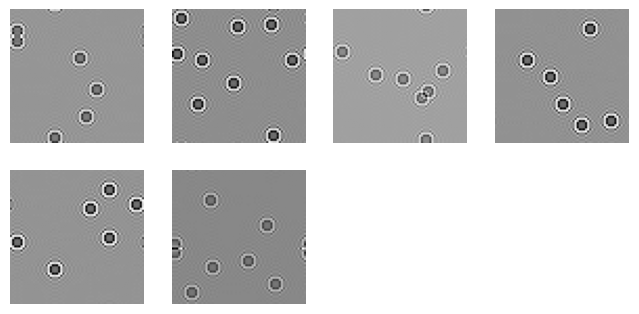

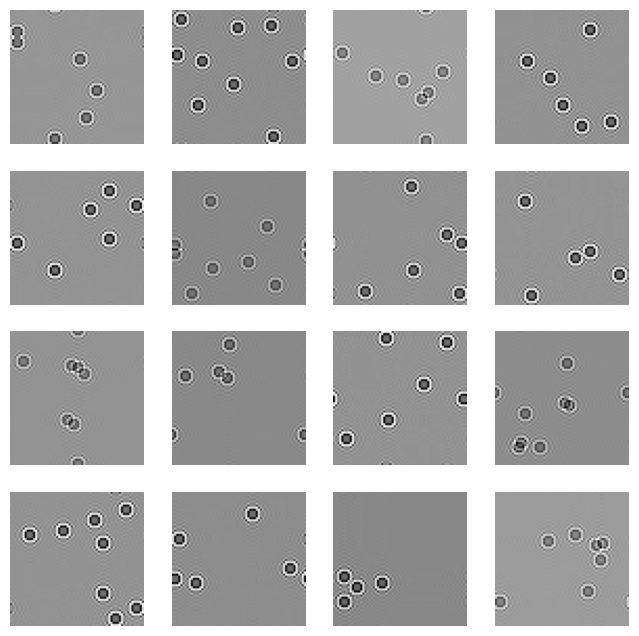

In [14]:
# Train data
fig = plt.figure(figsize=(8,8))

for i in range(16):
    test = X_train[i*30].reshape(64,64)
    plt.subplot(4,4,i+1)
    plt.imshow(test,cmap='gray')
    plt.axis('off')
    plt.savefig("figure.png")
plt.show()

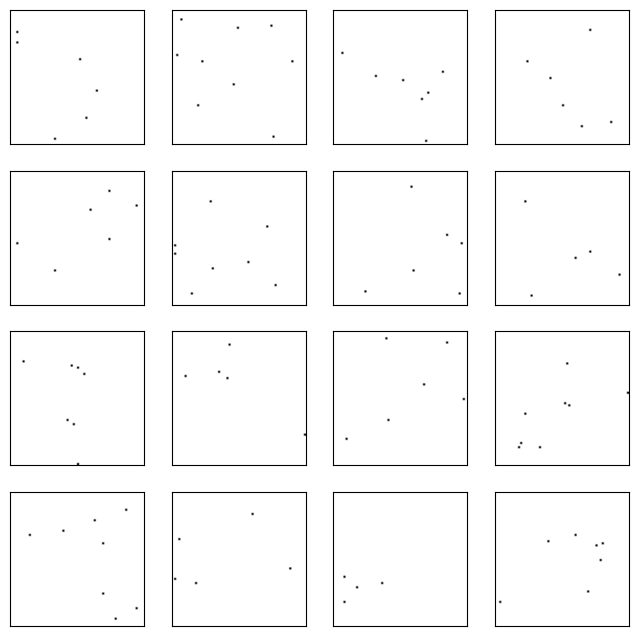

In [15]:
# Train label data
fig = plt.figure(figsize=(8,8))

for i in range(16):
    test = y_train[i*30].reshape(64,64)
    plt.subplot(4,4,i+1)
    plt.imshow(test,cmap='gray')
    plt.axis('image')
    plt.xticks([])
    plt.yticks([])
    plt.savefig("label data taining")
plt.show()

CREATING CNN MODEL

In [16]:
shap = (64,64,1)
inp = Input(shape=shap)
d1 = Conv2D(filters=20,kernel_size=3,strides=2,activation='relu',padding='same')(inp)
e1 = Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='relu',padding='same')(d1)
model = Model(inp,e1)

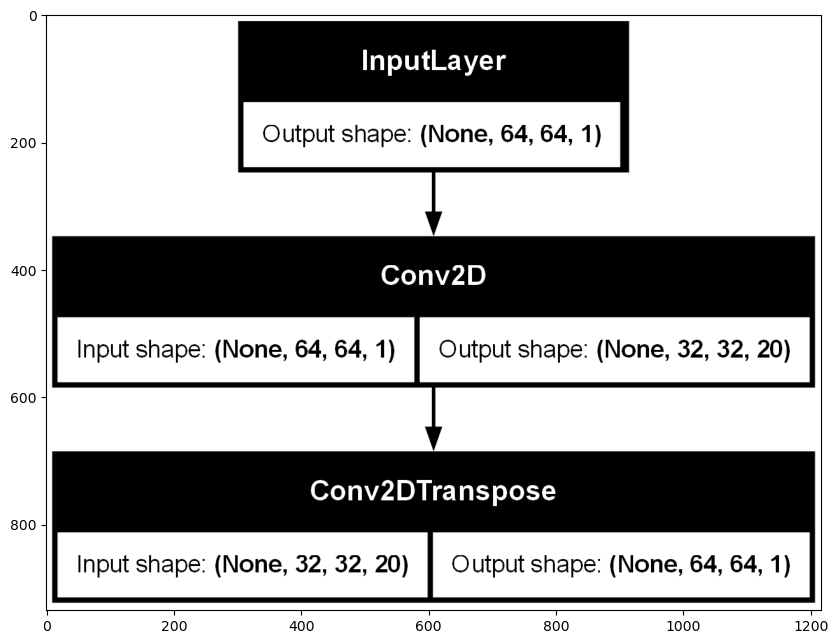

In [18]:
plot_model(model,to_file='model.png',show_shapes=True)
data = plt.imread('model.png')
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')
plt.savefig("cnn model plot")
plt.show()

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 20)          │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 1)           │             181 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
with open("model_summary.txt", "w", encoding="utf-8") as f:
    model.summary(print_fn=lambda x: f.write(x + "\n"))

In [22]:
model.compile(optimizer='adam',loss="mse",metrics=['mse'])

TRAINING MODEL

In [23]:
training = model.fit(X_train, y_train, batch_size=16, epochs=200)

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 3507.2351 - mse: 3507.2351  
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 220.1710 - mse: 220.1710
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 111.8475 - mse: 111.8475
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 66.0263 - mse: 66.0263
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 54.2249 - mse: 54.2249
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 50.3150 - mse: 50.3150
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 48.0504 - mse: 48.0504
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 46.5750 - mse: 46.5750
Epoch 9/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 45.5483 - mse: 45.5483
Epoch 10/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 44.7046 - mse: 44.7046
Epoch 11/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 43.8636 - mse: 43.8636
Epoch 12/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/ste

LOSS CURVE

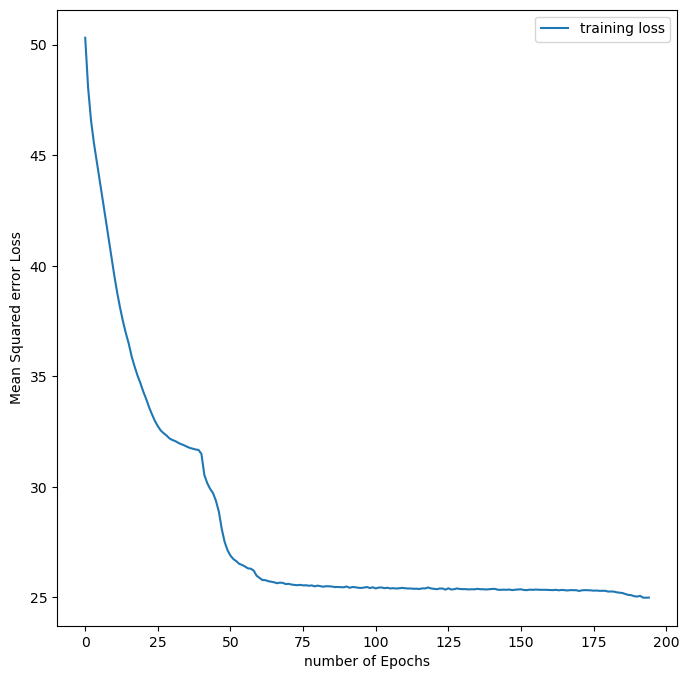

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(training.history['loss'][5:])
#plt.plot(training.history['val_loss'][5:])
plt.legend(['training loss','testing loss'])
plt.xlabel('number of Epochs')
plt.ylabel('Mean Squared error Loss')
plt.savefig('Loss_image')
plt.show()

Final Output of CNN and after Local Threshold

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


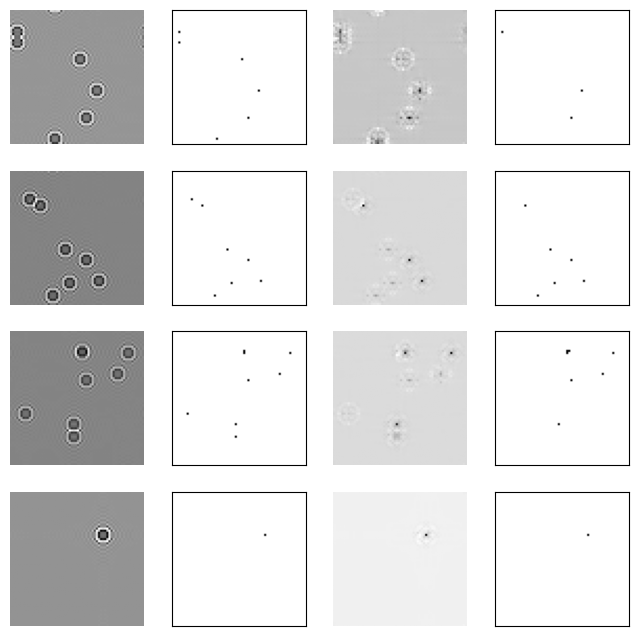

In [25]:
fig = plt.figure(figsize=(8,8))
y_pred = model.predict(X_train)
for i in range(4):
    xte = X_train[i*200].reshape(64,64) #X_test image
    yte = y_train[i*200].reshape(64,64) #y_test image
    cnn = y_pred[i*200].reshape(64,64) #output of the CNN
    local_thresh = threshold_local(cnn,block_size = 11,offset=25)
    fin = cnn > local_thresh         # final output after local thresholding

    plt.subplot(4,4,i*4+1)
    plt.imshow(xte,cmap='gray')
    plt.axis('off')

    plt.subplot(4,4,i*4+2)
    plt.imshow(yte,cmap='gray')
    plt.axis('image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4,4,i*4+3)
    plt.imshow(cnn,cmap='gray')
    plt.axis('off')

    plt.subplot(4,4,i*4+4)
    plt.imshow(fin,cmap='gray')
    plt.axis('image')
    plt.xticks([])
    plt.yticks([])
plt.savefig('final output_pic')
plt.show()

SET UP SIMULATION PARAMETERS, CREATE A CIRCULAR APERTURE(SYNTHETIC OBJECT), 

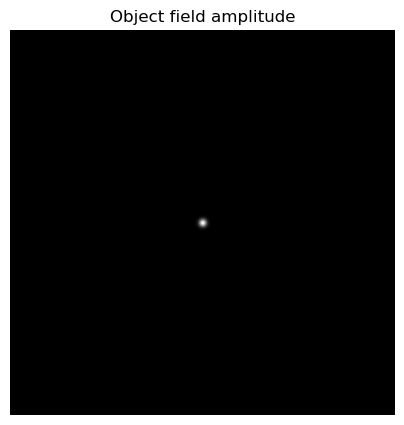

In [26]:
wavelength = 633e-9
k = 2 * np.pi / wavelength
z = 0.01
dx = 10e-6
N = 512
x = np.linspace(-N//2, N//2 - 1, N) * dx
X, Y = np.meshgrid(x, x)
radius = 50e-6
object_field = np.exp(-((X**2 + Y**2)/ (radius**2)))
plt.figure(figsize=(5,5))
plt.title("Object field amplitude")
plt.imshow(object_field, cmap='gray')
plt.colorbar
plt.axis('off')
plt.savefig("object field")
plt.show()

fresnel propagation using transfer function approach

In [27]:
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * wavelength * z * (FX**2 + FY**2))  # Fresnel kernel
U1 = fft2(object_field)
U2 = U1 * H
u2 = ifft2(U2)

plot propagated field and amplitude phase

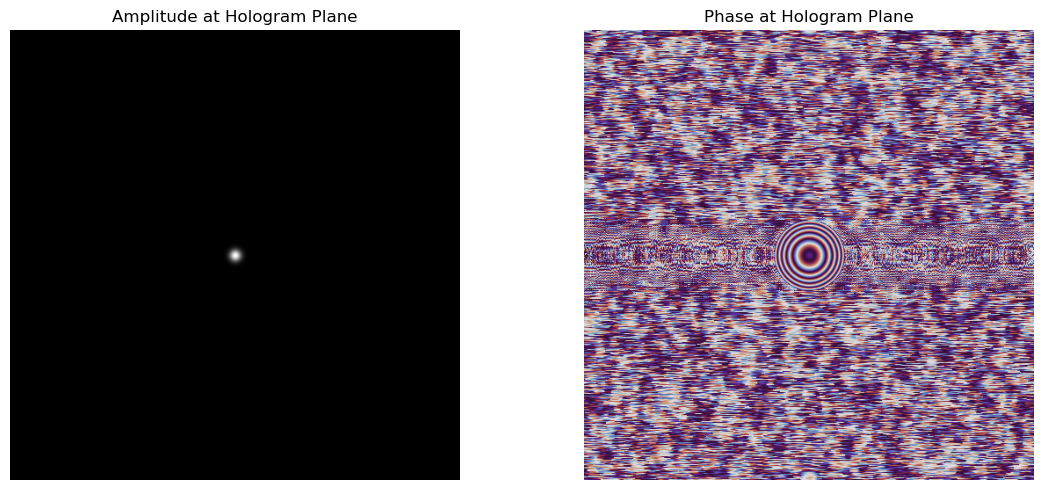

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Amplitude at Hologram Plane")
plt.imshow(np.abs(u2), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Phase at Hologram Plane")
plt.imshow(np.angle(u2), cmap='twilight')
plt.axis('off')

plt.tight_layout()
plt.savefig("Amplitude and Phsde at hologram plane")
plt.show()

Object Motion and Hologram Animation

In [29]:
# Constants
wavelength = 633e-9  # 633 nm
k = 2 * np.pi / wavelength
z = 0.01  # 1 cm propagation
dx = 10e-6
N = 128  # smaller for fast animation
# Grid setup
x = np.linspace(-N//2, N//2 - 1, N) * dx
X, Y = np.meshgrid(x, x)
# Fresnel kernel (Fourier domain)
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
H = np.exp(-1j * np.pi * wavelength * z * (FX**2 + FY**2))

# Initialize figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
obj_ax, holo_ax = ax

# Empty plots
obj_im = obj_ax.imshow(np.zeros((N, N)), cmap='gray', vmin=0, vmax=1)
holo_im = holo_ax.imshow(np.zeros((N, N)), cmap='gray')
obj_ax.set_title("Moving Object")
holo_ax.set_title("Simulated Hologram")
[obj_.axis('off') for obj_ in ax]

# Bright dot object generator
def create_moving_object(frame):
    pos = int(N * (frame / num_frames))
    field = np.zeros((N, N))
    if 0 <= pos < N:
        field[N//2, pos] = 1.0
    return field

# Update function
num_frames = 50
def update(frame):
    object_field = create_moving_object(frame)
    U1 = fft2(object_field)
    U2 = U1 * H
    u2 = ifft2(U2)

    obj_im.set_data(object_field)
    holo_im.set_data(np.abs(u2)**2)

    return [obj_im, holo_im]

# Animate
ani = FuncAnimation(fig, update, frames=num_frames, interval=100, blit=True)
plt.close()
ani.save("moving_object_hologram.gif", writer='pillow', fps=10)  # Save as GIF

# Display
HTML(ani.to_jshtml())

ANIMATE TRAINING LOSS

In [30]:
#Animate Training Loss
# Simulated training data
epochs = 100
loss = np.exp(-np.linspace(0, 5, epochs)) + 0.05 * np.random.randn(epochs)
loss = np.clip(loss, a_min=0, a_max=None)  # Ensure non-negative

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], lw=2, color='blue')
ax.set_xlim(0, epochs)
ax.set_ylim(0, max(loss) + 0.1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("CNN Training Loss Over Epochs")

# Initialize function
def init():
    line.set_data([], [])
    return line,

# Update function
def update(epoch):
    x = np.arange(epoch + 1)
    y = loss[:epoch + 1]
    line.set_data(x, y)
    return line,

# Animate

ani = FuncAnimation(fig, update, frames=epochs, init_func=init, blit=True, interval=100)
plt.close()
ani.save("visualize training loss.gif", writer='pillow', fps=10)  # Save as GIF)

# Display in notebook
HTML(ani.to_jshtml())
                       